In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("trainKNN.txt" , header=None,
                 names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')

test = pd.read_csv("testKNN.txt" , header=None,
                 names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')

In [4]:
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7


In [5]:
test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3


In [6]:
print(train.shape,test.shape)

(196, 10) (18, 10)


In [9]:
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 211
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 68 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             18 non-null     float64
 1   Na             18 non-null     float64
 2   Mg             18 non-null    

In [11]:
test.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [12]:
x=train.drop(columns='Type of glass')

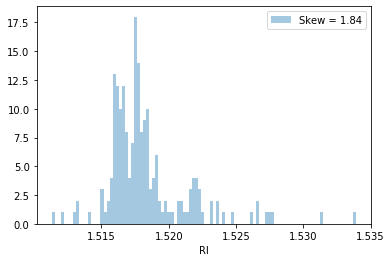

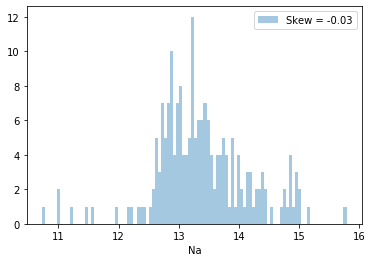

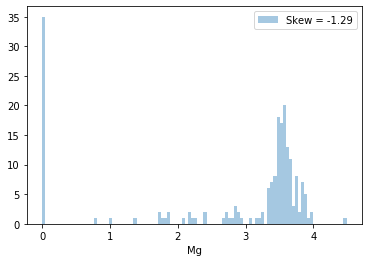

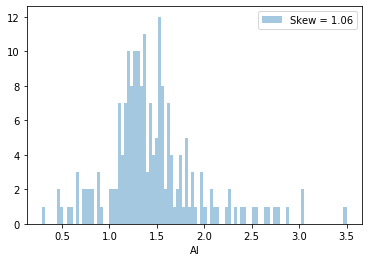

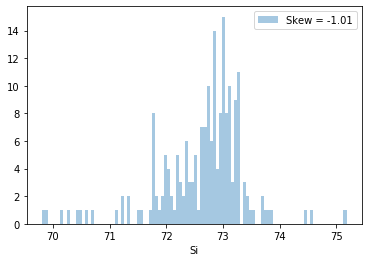

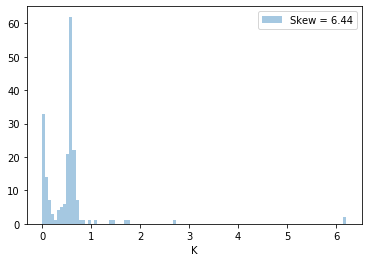

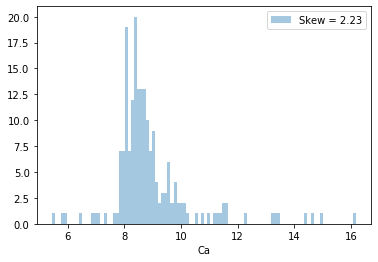

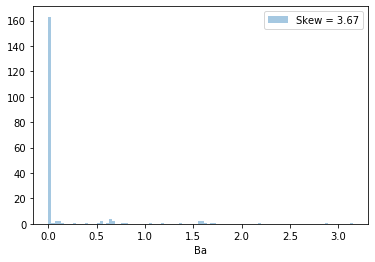

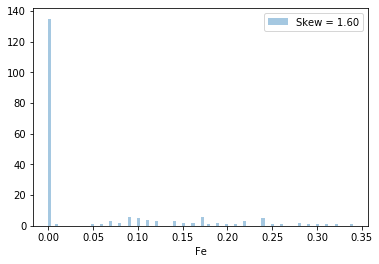

In [14]:
for col in x:
    skew = train[col].skew()
    sns.distplot(train[col],kde=False,label='Skew = %.2f' %(skew),bins=100)
    plt.legend(loc='best')
    plt.show()

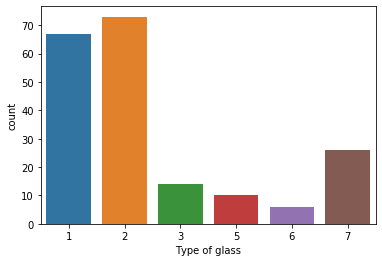

In [15]:
sns.countplot(train['Type of glass'])

In [17]:
x_train = train.drop(columns=['Type of glass',],axis=1)

x_test = test.drop(columns=['Type of glass'],axis=1)

y_train = train['Type of glass']

y_test = test['Type of glass']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Eucledian matrix

In [24]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train)  
KNeighborsClassifier(metric='euclidean')
euclid_pred = classifier.predict(x_test)
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100
print("Accuracy Score of Euclidean Metric : \t ",euclid_score)

Accuracy Score of Euclidean Metric : 	  55.55555555555556


In [25]:
classifier.score(x_test,y_test)*100

55.55555555555556

Manhatten matrix

In [26]:
classifier= KNeighborsClassifier(metric='manhattan')  
classifier.fit(x_train, y_train)
manhat_pred = classifier.predict(x_test)
manhat_score= accuracy_score(y_test,manhat_pred)*100
print("Accuracy score of Manhattan metric : \t ",manhat_score)

Accuracy score of Manhattan metric : 	  55.55555555555556


In [27]:
print(classification_report(y_test,manhat_pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.60      0.56      0.49        18
weighted avg       0.60      0.56      0.49        18



D:\Applications\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
